In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create a DataFrame
data = {'column1': [1, 2, 3, 4, 5],
        'column2': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation_matrix = df.corr()
correlation_coefficient = correlation_matrix.loc['column1', 'column2']

print("Correlation Coefficient:", correlation_coefficient)
correlation_matrix

Correlation Coefficient: -1.0


,column1,column2
column1,1.0,-1.0
column2,-1.0,1.0


In [3]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Calculate the correlation coefficient
correlation_matrix = df.corr()
# correlation_coefficient = correlation_matrix.loc['column1', 'column2']

# print("Correlation Coefficient:", correlation_coefficient)
correlation_matrix 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


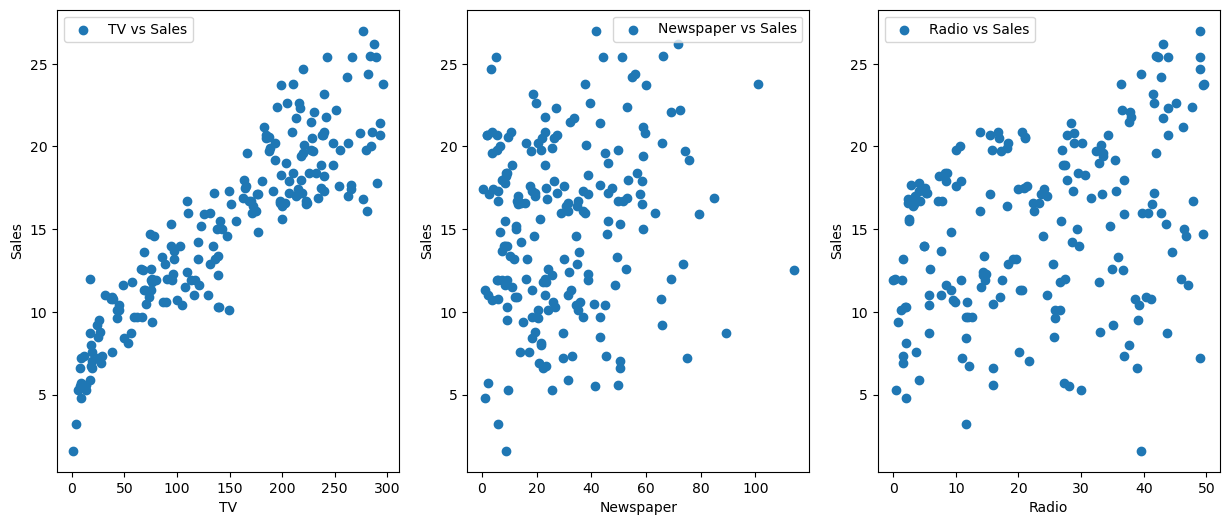

In [8]:
plt.figure(figsize=(15,6))
# fig= plt.figure(figsize=(6, 3))  # 6 inches wide, 3 inches tall

# Create the first subplot (1 row, 2 columns, first plot)
ax1 = plt.subplot(1, 3,1)#(rows,columns,placing)#return axis and figure
ax1.scatter(df['TV'], df['Sales'], label="TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
# Create the second subplot (1 row, 2 columns, second plot)
ax2 = plt.subplot(1, 3, 2)
ax2.scatter(df['Newspaper'], df['Sales'], label="Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.legend()
ax3=plt.subplot(1,3,3)
ax3.scatter(df['Radio'], df['Sales'], label="Radio vs Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
# Display the plot
plt.legend()

plt.show()

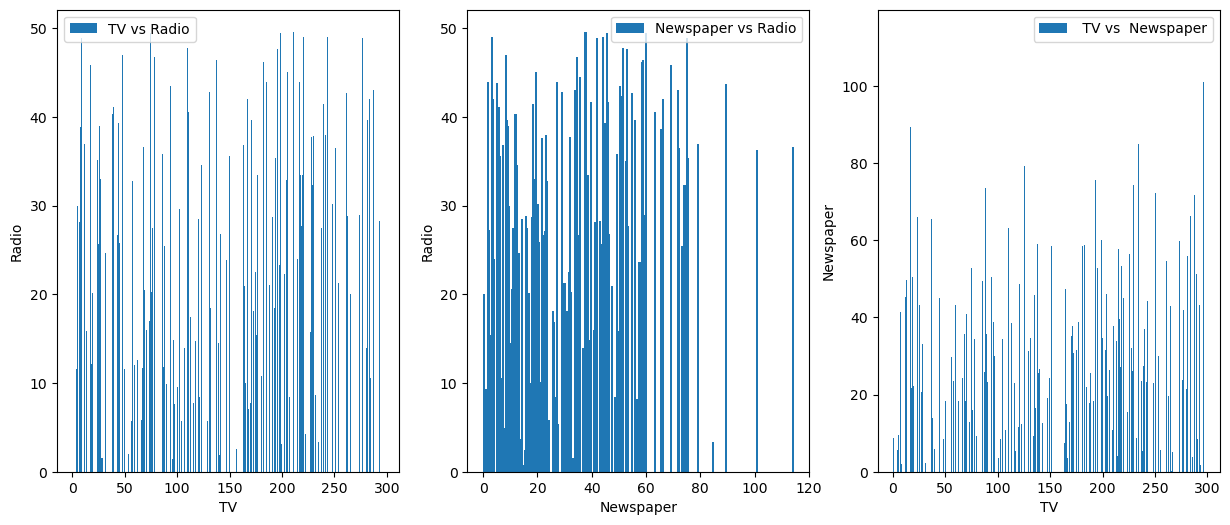

In [9]:
# check independancy of the features
plt.figure(figsize=(15,6))
# fig= plt.figure(figsize=(6, 3))  # 6 inches wide, 3 inches tall

# Create the first subplot (1 row, 2 columns, first plot)
ax1 = plt.subplot(1, 3,1)#(rows,columns,placing)#return axis and figure
ax1.bar(df['TV'], df['Radio'], label="TV vs Radio")
plt.xlabel("TV")
plt.ylabel("Radio")
plt.legend()
# Create the second subplot (1 row, 2 columns, second plot)
ax2 = plt.subplot(1, 3, 2)
ax2.bar(df['Newspaper'], df['Radio'], label="Newspaper vs Radio")
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.legend()
ax3=plt.subplot(1,3,3)
ax3.bar( df['TV'],df['Newspaper'], label=" TV vs  Newspaper")
plt.ylabel("Newspaper")
plt.xlabel("TV")
# Display the plot
plt.legend()

plt.show()

In [10]:
# without splitting the data into the test and train means there is a 100% accurate model.

# from sklearn.linear_model import LinearRegression #here import only linearRegression
from sklearn import linear_model
# linear_model.LinearRegression()
reg = linear_model.LinearRegression()
# Fit the linear regression model
reg.fit(df[['TV']], df['Sales'])
# Access the slope (m) and intercept (c) of the line
m = reg.coef_[0]
c = reg.intercept_

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 0.055464770469558874
Intercept (c): 6.974821488229891


In [11]:
predicted_value = reg.predict([[17.2]])

print("Predicted value:", predicted_value)


Predicted value: [7.92881554]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
reg = linear_model.LinearRegression()

X=df[['TV']]
Y=df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)

#model evaluation
accuracy_score=reg.score(X_test, Y_test)
accuracy_score

0.7288982770999352

In [13]:
Y_test

121     7.0
9      15.6
85     20.2
178    16.8
106     7.2
42     20.7
127    11.9
65     11.3
83     13.6
90     14.0
129     9.7
172     7.6
94     11.5
135    11.6
27     20.9
169    20.0
152    16.6
134    10.8
189     6.7
150    16.1
43     17.9
49      9.7
196    14.0
76      6.9
148    10.9
128    24.7
32     13.2
138     9.6
162    19.9
84     21.7
46     10.6
115    12.6
95     16.9
67     13.4
69     22.3
139    20.7
147    25.4
25     17.0
55     23.7
21     17.5
Name: Sales, dtype: float64

In [14]:
X_test

,TV
121,18.8
9,199.8
85,193.2
178,276.7
106,25.0
42,293.6
127,80.2
65,69.0
83,68.4
90,134.3


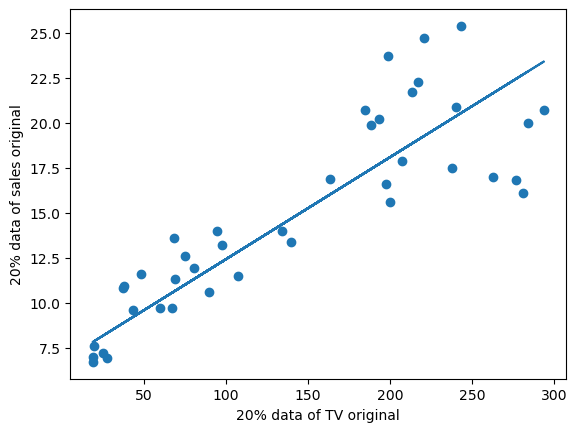

In [15]:
#these graphs shows the relationship between the original sales of tv and predictions sales of tv by model
fig=plt.figure()
plt.scatter(X_test, Y_test)
plt.xlabel("20% data of TV original")
plt.ylabel("20% data of sales original")
plt.plot(X_test, predictions)
plt.show()

In [16]:
df2=pd.DataFrame(Y_test)
df2['Predict']=predictions
df2['Error']=abs(df2['Sales'] - df2['Predict'])
df2['Error%']=(df2['Error']/df2['Sales'])*100
df2

,Sales,Predict,Error,Error%
121,7.0,7.814919,0.814919,11.641702
9,15.6,18.088998,2.488998,15.955115
85,20.2,17.714363,2.485637,12.305133
178,16.8,22.454062,5.654062,33.655134
106,7.2,8.166849,0.966849,13.428457
42,20.7,23.413355,2.713355,13.107995
127,11.9,11.300159,0.599841,5.040680
65,11.3,10.664415,0.635585,5.624646
83,13.6,10.630357,2.969643,21.835608
90,14.0,14.371030,0.371030,2.650216


In [17]:
d = df2['Error%'].mean()
d =(100-d) 
d

86.17382784889818

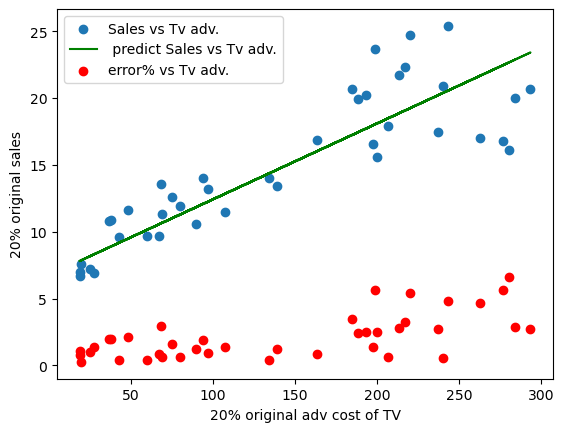

In [18]:
fig=plt.figure()
plt.scatter(X_test, df2['Sales'], label="Sales vs Tv adv.")
plt.xlabel("20% original adv cost of TV")
plt.ylabel("20% original sales")
plt.plot(X_test,df2['Predict'], color='g',label=" predict Sales vs Tv adv.")
plt.scatter(X_test, df2['Error'], color='r',label="error% vs Tv adv.")
plt.legend()
plt.show()

This above figure shows:
1. The variations of the actual values of Sales of TV with  TV advertising cost (taking only 20% test data)
2. It also shows relationship b/w the predicting values of Sales with TV Advertising cost.
3. It also shows the relationship b/w error% and Tv advertising cost.

In [29]:
import tkinter as tk
from tkinter import Entry, Button, Label, StringVar

# Create the GUI window
window = tk.Tk()
window.title("Sales Prediction")
window.geometry("800x500")

# Function to predict sales when the button is clicked
def predict_sales():
    try:
        advertising_cost = float(ad_cost_entry.get())
        prediction = reg.predict([[advertising_cost]])
        result_label.config(text=f"Predicted Sales: {prediction[0]:.2f}", fg="green")
    except ValueError:
        result_label.config(text="Please enter a valid number.", fg="red")

# Create GUI components with style
ad_cost_label = Label(window, text="Enter Advertising Cost on TV:", font=("Arial", 12))
ad_cost_entry = Entry(window, font=("Arial", 12))
predict_button = Button(window, text="Predict Sales", command=predict_sales, font=("Arial", 12), bg="blue", fg="white")
result_label = Label(window, text="", font=("Arial", 14))

# Place GUI components on the window
ad_cost_label.pack(pady=10)
ad_cost_entry.pack(pady=5)
predict_button.pack(pady=10)
result_label.pack(pady=5)

window.mainloop()


In [26]:
# import tkinter as tk
# from tkinter import Entry, Button, Label, StringVar
# from PIL import Image, ImageTk

# # Create the GUI window
# window = tk.Tk()
# window.title("Sales Prediction")
# window.geometry("800x400")  # Wider window to accommodate both image and UI

# # Load and display the image on the left side
# image = Image.open("img.jpg")  # Replace with your image file path
# image = image.resize((400, 400), Image.ANTIALIAS)  # Resize image to fit the left half
# photo = ImageTk.PhotoImage(image)
# image_label = Label(window, image=photo)
# image_label.photo = photo  # Keep a reference to the image object
# image_label.pack(side="left")

# # Create the right half for the UI
# ui_frame = tk.Frame(window)
# ui_frame.pack(side="right")

# # Function to predict sales when the button is clicked
# def predict_sales():
#     try:
#         advertising_cost = float(ad_cost_entry.get())
#         prediction = reg.predict([[advertising_cost]])
#         result_label.config(text=f"Predicted Sales: {prediction[0]:.2f}", fg="green")
#     except ValueError:
#         result_label.config(text="Please enter a valid number.", fg="red")

# # Create GUI components with style
# ad_cost_label = Label(ui_frame, text="Enter Advertising Cost on TV:", font=("Arial", 12))
# ad_cost_entry = Entry(ui_frame, font=("Arial", 12))
# predict_button = Button(ui_frame, text="Predict Sales", command=predict_sales, font=("Arial", 12), bg="blue", fg="white")
# result_label = Label(ui_frame, text="", font=("Arial", 14))

# # Place GUI components on the right side
# ad_cost_label.pack(pady=10)
# ad_cost_entry.pack(pady=5)
# predict_button.pack(pady=10)
# result_label.pack(pady=5)

# window.mainloop()
